# Task 3 - Prediction using Unsupervised ML
## Submitted By: Manish
### From the given 'Iris' dataset, to predict the optimum number of clusters and represent it visually.

In [6]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

#Load the IRIS dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) #To display first 10 rows of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### Finding the optimum number of clusters for K Means. 

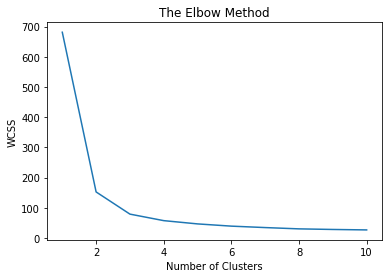

In [7]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values #Stores the data from the dataset as an array of lists

from sklearn.cluster import KMeans
wcss = [] # Within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
# allowing us to observe 'The elbow'
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We can clearly see why it is called 'The Elbow Method' from the above graph, the optimum clusters is where the elbow occurs. This is when the Within Cluster Sum of Squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**

In [8]:
# Applying K-Means to the dataset / Creating the K-Means classifier
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(x)

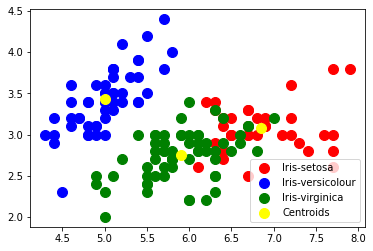

In [9]:
# Visualising the clusters - On the first 2 columns
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c='red', label='Iris-setosa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c='blue', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c='green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Yellow', label = 'Centroids')
plt.legend()